In [1]:
import numpy as np
# Math operations
import matplotlib.pyplot as plt
# Presentable graphs, optional
from mpl_toolkits.mplot3d import Axes3D
# Presentable 3D Graphs, optional

In [2]:
observations = 1000
#Here I declare a variable containing the size of the training set.

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))
# The size should be n x k, where n is number of observations and k is number of variables.

inputs = np.column_stack((xs,zs))
# 'np.column_stack' stacks the observations into a matrix, which results in a matrix with dimensions 1000 x 2.
# I did this because I want to make sure that I can multiply x with w, because the linear model (y=xw+b) relies on that operation.
print (inputs.shape)
# Checked n x k , where n should be the number of observations and k is the number of variables.

(1000, 2)


In [3]:
noise = np.random.uniform(-1, 1, (observations,1))
# I introduced the noise to randomize my data a bit. 
# Real data always contains noise - it's never perfect - so introducing some noise makes the data a bit more random.

targets = 4*xs - 6*zs + 10 + noise
# A two-variable linear model, which is completely arbitrarily chosen.
# The Weights are 4 and -6 and the Bias is 10. 
# My goal is that my ML algorithm to learn that this is the function.

print (targets.shape)
# Checked n x m, where m should be the number of output variables.

(1000, 1)


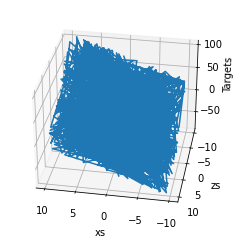

In [4]:
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)
# I reshaped the targets in order to use the 3D Plot.

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# A method to create the 3D Plot
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
# I wanted to see whether there is a strong trend that the model should learn to reproduce.

targets = targets.reshape(observations,1)
xs = xs.reshape(observations,1)
zs = zs.reshape(observations,1)
# I really didn't need to use the 3D Plot, so I reshaped the targets and the variables back.

In [5]:
init_range = 0.1
# The gradient descent starts from an arbitrary number, but I don't want to have this. Rather, I aim to randomly select some small initial weights.
# The init_range determines the interval where the initial weights and biases will be picked randomly. In this case, it is [-0.1, 0.1].
# Here the initial random weights and biases will be picked from -0.1 to 0.1
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))
# Here I generated the weights randomly using this code.
# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In this exercise, the weights matrix is 2x1 since there are 2 variables (x and z) and 1 output (y)
biases = np.random.uniform(low=-init_range, high=init_range, size=1)
# Here I generated the size of the biases randomly using this code.
# In ML, there are as many biases as there are outputs. 
# So in this exercise, there is only 1 bias as there is only 1 output.
# The bias is a scalar.

print (weights)
print (biases)

[[0.00477031]
 [0.04712066]]
[0.07519533]


In [6]:
learning_rate = 0.02
# The learning rate determines the speed of the minimization of the Loss Function of the ML Algorithm.
# Gradient Descent depends on the learning rate.
# I chose this learning rate. It must not be too high that the GD iterates forever and too low that GD oscillates forever, never reaching the global minimum loss.

In [7]:
# The ML Algorithm
for i in range (100):
    
    outputs = np.dot(inputs,weights) + biases
    # This is the linear model: y = xw + b equation
    # I used Numpy to multiply matrices using the Dot Method.
    deltas = outputs - targets
    # Here, 'deltas' records the difference between outputs and targets, where deltas is 1000 x 1.
    # 'deltas' is a pythonic 1000x1 array.
    # This is the Error of the ML Algorithm.
        
    loss = np.sum(deltas ** 2) / 2 / observations
    # Calculates the loss function that compares the outputs to the targets.
    # I used the L2-norm loss because this is a Regression. 
    # I divided it by 2 to get the elegant Update Rules from the Gradient Descent.
    # I divided it by the number of observations to get the Cost Function, which is the average loss per observation.
    # I adjusted the loss instead of the learning rate. This makes the learning of the ML independent of the number of observations.
    
    print (loss)
    # I decided to print the loss function at each step so I can analyze whether it is decreasing as desired and my ML algorithm is learning.
    
    deltas_scaled = deltas / observations
    # This is another way to make the algorithm more universal.
   
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    # The weights are 2x1, learning rate is 1x1 (scalar), inputs are 1000x2, and deltas_scaled are 1000x1
    # '.T' is a method to transform matrices and perform the desired operation
    biases = biases - learning_rate * np.sum(deltas_scaled)
    # I transformed the inputs for the operation to proceed
    # The weights are updated in a linear algebraic way (a matrix minus another matrix).
    # I updated the weights and the biases following the gradient descent methodology.

916.9835041255902
138.2318801160056
55.23295933839509
44.96105423180897
42.34970849165078
40.59950903720254
38.997544208063424
37.46699047326187
35.99760935816278
34.58621346499512
33.23043673398844
31.928079207391246
30.677035248365936
29.475282985371408
28.32088029386025
27.211961578738723
26.14673475112295
25.123478331322534
24.140538666718342
23.196327259336403
22.289318198725166
21.418045695979266
20.581101714924085
19.777133696632557
19.004842373597207
18.262979670024528
17.55034668485896
16.865791754276405
16.208208590516406
15.576534494045285
14.969748636160622
14.386870409262075
13.826957842122187
13.289106077596156
12.772445910310616
12.276142381968105
11.799393431997101
11.341428601367083
10.90150778747387
10.478920048082978
10.072982452398202
9.68303897739854
9.308459447659969
8.948638516948675
8.60299468994002
8.270969382482173
7.952026018885763
7.64564916478072
7.351343694138976
7.068633989116803
6.797063171423723
6.536192363975844
6.285599981640338
6.044881049924956
5.81

In [8]:
print (weights, biases)
# The bias improves as the number of iterations increases.

[[ 3.98195218]
 [-5.99577307]] [8.6434976]


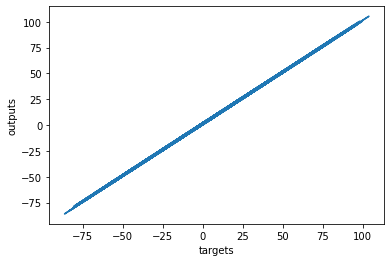

In [10]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()
# While this is not needed and may not be possible in other problems, I decided to plot the outputs and targets to check if they have a linear relationship.
# The closer the plot is to a 45 degree line, the closer target and output values are.